# NAME: EMMANUEL INEGET
# COURSE NAME: DATA ANALYSIS AND PROCESS MINING 
# COURSE CODE: DSC8204
# COURSE FACILITATOR(S):  DR. DAPHINE NYACHAKI BITALO
# EXAM TYPE: PROJECT-BASED EXAM

## PART A -- Goal 4: Prediction of Heart Arrhythmia in the Health Sector   [30 Marks]

1. Data Collection and Preprocessing: 
    - a. Data Source:  You are provided with a arrhythmia_data “arrhythmia1.data.csv” which contains medical data and a text file that contains the variable descriptions (“arrhythmia.names.txt”) 
    - b. Preprocess the arrhythmia_data for further analyses. 

In [71]:
# installing the required libraries
# %pip install numpy pandas matplotlib seaborn sklearn scipy tabulate

In [119]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore
from scipy.stats import shapiro, pearsonr
from scipy.stats import linregress

from tabulate import tabulate
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [73]:
# read the CSV file into a DataFrame
arrhythmia_data = pd.read_csv('arrhythmia-1.data.csv', na_values=['?'])
arrhythmia_data.head()

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,NaN


In [74]:
# View information about the arrhythmia_data
arrhythmia_data.info()

# Count the number of duplicate rows
duplicates = arrhythmia_data.duplicated().sum()
print(f"\n\nThere are {duplicates} duplicate values.\n" if duplicates else "\n\nThere are no duplicates.\n")

# Details about the arrhythmia_data
print(f"\n Below are the variables with missing values:\n{arrhythmia_data.columns[arrhythmia_data.isna().any()]}")
print(f"\nStatistics of missing data:\n{arrhythmia_data.isna().sum()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           452 non-null    int64  
 1   Sex           452 non-null    int64  
 2   Height        452 non-null    int64  
 3   Weight        452 non-null    int64  
 4   QRS Duration  452 non-null    int64  
 5   P-R interval  452 non-null    int64  
 6   Q-T interval  452 non-null    int64  
 7   T interval    452 non-null    int64  
 8   P interval    452 non-null    int64  
 9   QRS           452 non-null    int64  
 10  T             444 non-null    float64
 11  P             430 non-null    float64
 12  QRST          451 non-null    float64
 13  J             76 non-null     float64
 14  Heart rate    451 non-null    float64
dtypes: float64(5), int64(10)
memory usage: 53.1 KB


There are no duplicates.


 Below are the variables with missing values:
Index(['T', 'P', 'QRST', 'J', 'Heart 

##### Remarks on the arrhythmia data:
1. The arrhythmia_data has 452 records and 15 variables.
2. There are no duplicates in the arrhythmia_data.
3. `Sex` is a nominal variable whereas the rest are linear (continuous) variables
4. Missing values in the following variables:
    - `T`
    - `P`
    - `QRST`
    - `J`
    - `Heart rate`

**Data visualization of the numerical variables to check for normality and outliers**

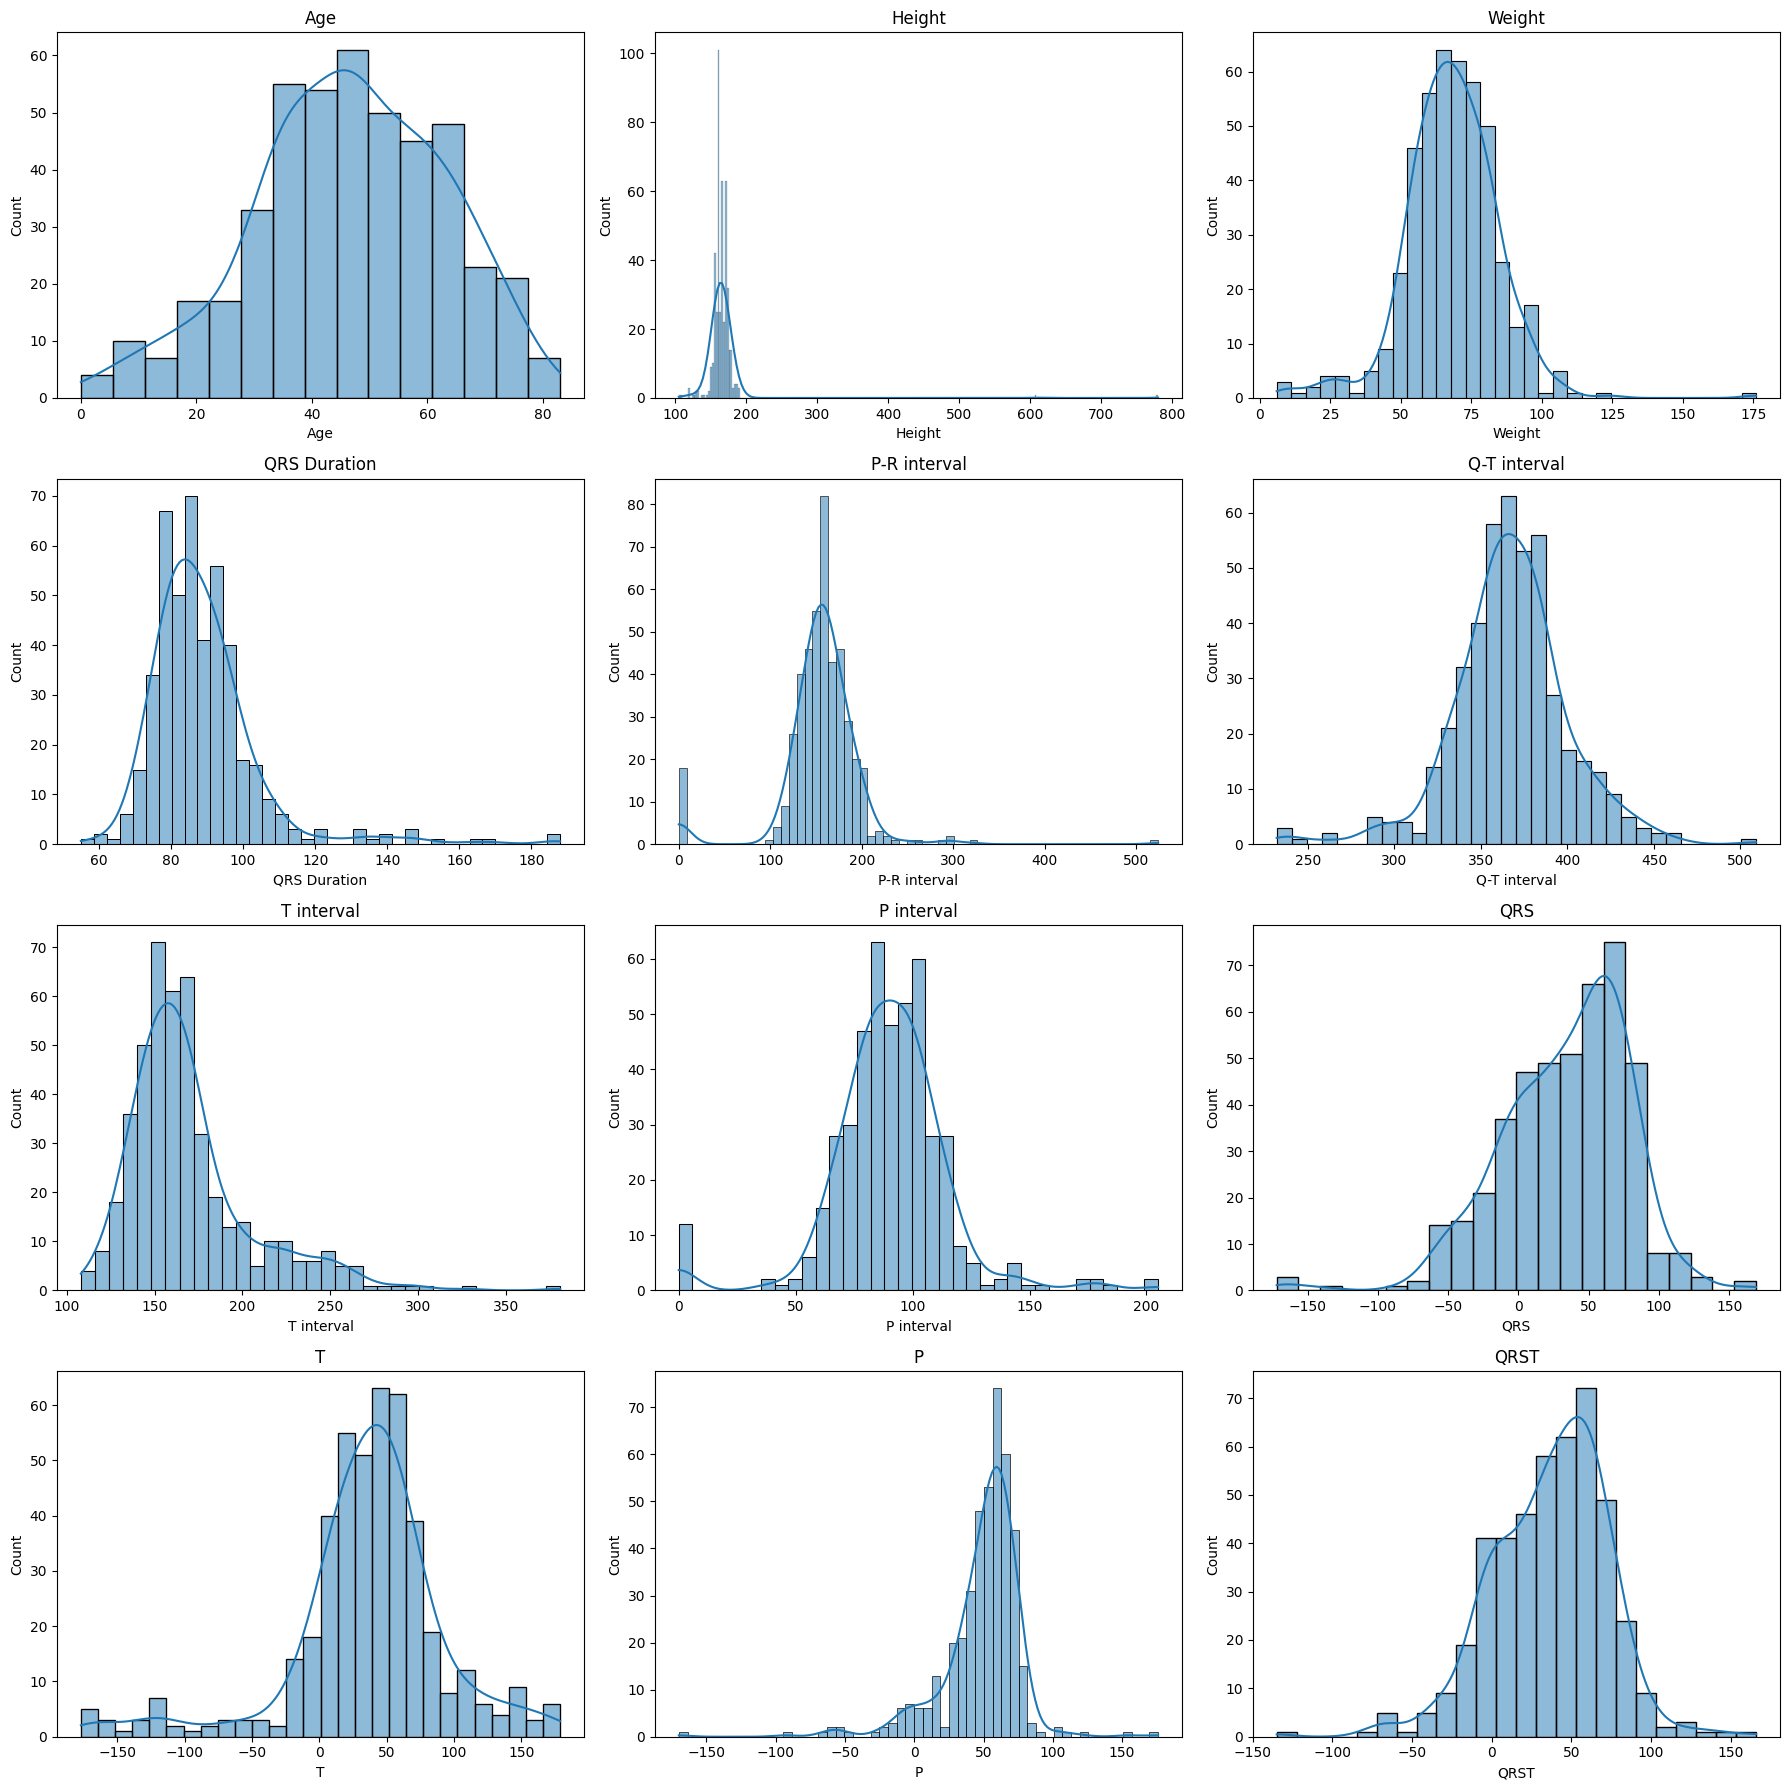

In [75]:
# Plotting histograms with normal distribution curves
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
axes = axes.flatten()

columns = ['Age', 'Height', 'Weight', 'QRS Duration', 'P-R interval', 'Q-T interval', 'T interval',
           'P interval', 'QRS', 'T', 'P', 'QRST']

for i, col in enumerate(columns):
    sn.histplot(arrhythmia_data[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#### Observations:
1. From the visual analysis of the plots above, most of the variables approximate a normal distribution. However, some variables appear to have some outliers.

##### Statistical Method to check for outliers

In [76]:
# Calculate Z-scores for the numerical columns
z_scores = arrhythmia_data.select_dtypes(include=[np.number]).apply(zscore)

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# List the outliers
outlier_indices = np.where(outliers)
outlier_records = arrhythmia_data.iloc[outlier_indices[0]]

print("Outliers detected:")
outlier_records

Outliers detected:


,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0
7,49,1,162,54,78,0,376,157,70,67,7.0,8.0,51.0,NaN,67.0
20,28,1,160,58,83,251,383,189,183,50,39.0,46.0,43.0,NaN,76.0
28,56,1,164,65,90,164,420,381,99,-8,153.0,41.0,0.0,NaN,79.0
29,51,1,160,83,96,147,400,301,82,-37,172.0,-5.0,-67.0,160.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,58,1,160,90,82,0,284,196,0,56,-132.0,NaN,81.0,NaN,104.0
420,58,1,160,90,82,0,284,196,0,56,-132.0,NaN,81.0,NaN,104.0
424,7,0,119,21,140,157,438,226,81,-40,86.0,29.0,69.0,103.0,70.0
427,58,0,160,65,133,148,417,260,92,-158,13.0,63.0,-29.0,NaN,70.0


From the visual exploration of the outliers, I will handle them by replacing them with the mean

In [77]:
# The linear variables in the arrhythmia_data
linear_vars = ['Heart rate', 'Age', 'Height', 'Weight', 'QRS Duration', 'P-R interval', 'Q-T interval',
                'T interval', 'P interval', 'QRS', 'T', 'P', 'QRST', 'J']

for var in linear_vars:
    var_mean = arrhythmia_data[var].mean()
    var_std = arrhythmia_data[var].std()
    lower_whisker = arrhythmia_data[var].quantile(0.25) - 1.5 * var_std
    upper_whisker = arrhythmia_data[var].quantile(0.75) + 1.5 * var_std

    # Replace values below the lower whisker with the variable mean
    arrhythmia_data[var][arrhythmia_data[var] < lower_whisker] = var_mean

    # Replace values above the upper whisker with the variable mean
    arrhythmia_data[var][arrhythmia_data[var] > upper_whisker] = var_mean

Identify if the outliers have been handled

In [78]:
outliers = arrhythmia_data[(arrhythmia_data['Heart rate'] < lower_whisker) | (arrhythmia_data['Heart rate'] > upper_whisker)]
print("\n output of outliers")
outliers


 output of outliers


,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate


All outliers have been handled

##### Dealing with missing values that were earlier observed in the data:
1. Since `(376/452)` of the records are missing, I will go ahead and drop this variable.
2. I will replace missing values of `QRST`, `T`, `P` and `Heart rate` with the average

In [79]:
# replace missing values with the average for columns T, P, QRST, and Heart rate
arrhythmia_data[['T', 'P', 'QRST', 'Heart rate']] = arrhythmia_data[['T', 'P', 'QRST', 'Heart rate']].fillna(arrhythmia_data.mean())

# drop the J column
arrhythmia_data = arrhythmia_data.drop('J', axis=1)

2. Exploratory Data Analysis: 
    - a. Explain the distribution of the variables and whether they deviate far from the expected normal ranges of a heart experiencing arrhythmia 
    - b. Analyse the Heart rate distributions across the Sex and the Age of the patients. 

Summary statistics of the continous variabels:

In [ ]:
arrhythmia_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,452.0,47.624046,14.737328,12.0,37.0,46.735619,58.0,81.0
Height,452.0,163.852602,10.390252,105.0,160.0,164.000000,170.0,190.0
Weight,452.0,68.858226,12.195902,38.0,60.0,68.170354,78.0,100.0
QRS Duration,452.0,86.797537,9.543405,61.0,80.0,86.500000,93.0,114.0
P-R interval,452.0,158.791629,22.440778,103.0,145.0,157.000000,173.0,240.0
Q-T interval,452.0,367.947803,24.689113,301.0,353.0,367.207965,383.0,434.0
T interval,452.0,163.055907,22.901963,108.0,148.0,162.000000,172.0,231.0
P interval,452.0,90.287885,15.744533,42.0,80.0,90.004425,101.0,139.0
QRS,452.0,35.528967,39.751007,-63.0,8.0,40.000000,66.0,129.0
T,452.0,42.246469,35.215480,-68.0,20.0,40.000000,60.0,150.0


The average age is approximately 47.6 years, with a range of 12 to 81 years. The average height and weight are approximately 164 cm and 69 kg, respectively. Cardiac measurements such as QRS duration, P-R interval, Q-T interval, and heart rate have normal distributions, with the average heart rate at 73 bpm.

In [99]:
# Checking normality of the dependent variable 'Heart rate' using Shapiro-Wilk test
stat, p_value = shapiro(arrhythmia_data['Heart rate'])
print(f"Shapiro-Wilk Test for 'Heart rate':\nStatistic: {stat}, p-value: {p_value}\n")

# Checking normality of other numerical variables in comparison with 'Heart rate'
numerical_cols = arrhythmia_data.select_dtypes(include=[np.number]).columns
normality_results = {}

for col in numerical_cols:
    if col != 'Heart rate':
        stat, p_value = shapiro(arrhythmia_data[col])
        normality_results[col] = p_value

# Displaying the results in a tabular format
print("Normality Test Results (Shapiro-Wilk Test) in comparison with 'Heart rate':")
print(tabulate(normality_results.items(), headers=["Variable", "p-value"]))


Shapiro-Wilk Test for 'Heart rate':
Statistic: 0.9884332924673005, p-value: 0.0012074846241933747

Normality Test Results (Shapiro-Wilk Test) in comparison with 'Heart rate':
Variable          p-value
------------  -----------
Age           0.00747407
Height        2.43987e-17
Weight        0.0151571
QRS Duration  0.00945566
P-R interval  0.00210726
Q-T interval  0.0124372
T interval    1.72988e-09
P interval    0.767207
QRS           6.23553e-06
T             1.51577e-07
P             1.15307e-10
QRST          8.84067e-05


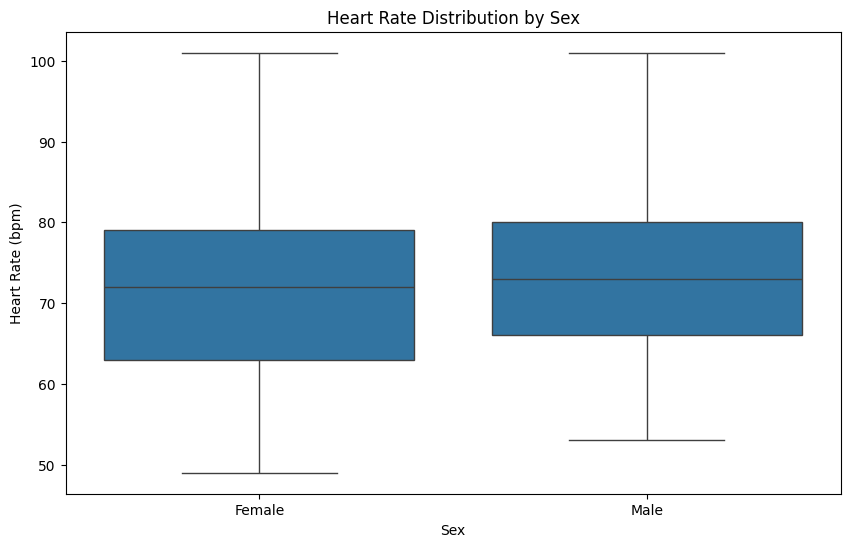

In [94]:
# Assume 'Sex' is binary (0 = Female, 1 = Male), adjust if needed
if 'Sex' in arrhythmia_data.columns:
    plt.figure(figsize=(10, 6))
    sn.boxplot(x=arrhythmia_data['Sex'], y=arrhythmia_data['Heart rate'])
    plt.title("Heart Rate Distribution by Sex")
    plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
    plt.ylabel("Heart Rate (bpm)")
    plt.show()

Both groups have the same range, and their heart rates span from about 50 bpm to just over 100 bpm. The median is ever so slightly greater for women compared to men, which may suggest a difference in central tendency. The interquartile ranges (IQR) are almost identical, so variability of heart rate is the same for both sexes. Both the whiskers extend to the same minimum and the same maximum, and there are no outliers. Even though females will tend to have a slightly higher median heart rate, the overall distribution of heart rates in the two groups appears to be very similar.

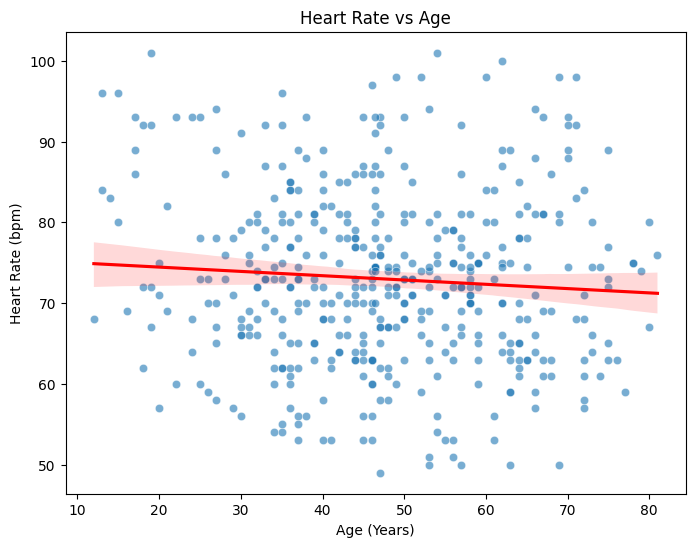

In [95]:
# Heart rate vs Age (Continuous Analysis)
plt.figure(figsize=(8, 6))
sn.scatterplot(x=arrhythmia_data["Age"], y=arrhythmia_data["Heart rate"], alpha=0.6)
sn.regplot(x=arrhythmia_data["Age"], y=arrhythmia_data["Heart rate"], scatter=False, color='red')  # Regression Line
plt.title("Heart Rate vs Age")
plt.xlabel("Age (Years)")
plt.ylabel("Heart Rate (bpm)")
plt.show()

#### Observations:
The slight downward slope  of the regression line at a moderate slope suggests weak negative correlation between heart rate and age, i.e., as age increases, heart rate decreases slightly. The wide spread of the points along the trend line, however, suggests high variability, i.e., age alone may not be an effective predictor of heart rate.

In [101]:
# Correlation between Age and Heart Rate
corr, p_value = pearsonr(arrhythmia_data["Age"], arrhythmia_data["Heart rate"])
print(f"Pearson Correlation between Age and Heart Rate: {corr:.3f} (p-value: {p_value:.3f})")

Pearson Correlation between Age and Heart Rate: -0.073 (p-value: 0.121)


In [102]:
# Summary statistics for Heart Rate across Sex
print("Heart Rate Statistics by Sex:\n", arrhythmia_data.groupby("Sex")["Heart rate"].describe())

Heart Rate Statistics by Sex:
         count       mean        std   min   25%   50%   75%    max
Sex                                                               
Female  249.0  73.962680  10.534959  53.0  66.0  73.0  80.0  101.0
Male    203.0  71.791239  10.893911  49.0  63.0  72.0  79.0  101.0


In [103]:
# Summary statistics for Heart Rate across Age (as a continuous variable)
print("\nOverall Heart Rate Statistics:\n", arrhythmia_data["Heart rate"].describe())


Overall Heart Rate Statistics:
 count    452.000000
mean      72.987453
std       10.740280
min       49.000000
25%       65.000000
50%       72.493727
75%       80.000000
max      101.000000
Name: Heart rate, dtype: float64


Observations:

1. Majority of the coefficients are below 0.05 and indication that the relationship was weak between the outcome and the predictors

2. The Q-T interval is the one that had a correlation coefficient (-0.65) that was below -0.3. However, it is a negative relationship.

3. The coefficients from the heatmap plot give a clear direction of the relationships between the outcome and the predictors. so this is an addition to
   the visual analysis that was done earlier to give a clear direction of the relationships.

**ANOVA test for Sex and Heart rate since Sex is a categorical variable**

In [ ]:
# create a dictionary to map the values of the sex variable
sex_map = {0: 'Male', 1: 'Female'}

# use the map function to label the values
arrhythmia_data['Sex'] = arrhythmia_data['Sex'].map(sex_map)

In [ ]:
# Conduct one-way ANOVA test
group1 = arrhythmia_data[arrhythmia_data['Sex'] == 'Male']['Heart rate']
group2 = arrhythmia_data[arrhythmia_data['Sex'] == 'Female']['Heart rate']
f_statistic, p_value = f_oneway(group1, group2)

# Create table with results
table = [['F statistic:', f_statistic],
         ['p-value:', p_value]]

# Print table
print(tabulate(table))

------------  ---------
F statistic:  4.60768
p-value:      0.0323631
------------  ---------


The ANOVA test result shows that the F statistic is 4.60768 with a corresponding p-value of 0.0323631.

Since the p-value (0.0323631) is less than the commonly used significance level of 0.05, we reject the null hypothesis and conclude that there is sufficient evidence to suggest a significant difference in heart rate between the two groups being compared. Therefore, we can conclude that the difference in heart rate between the two groups is statistically significant.

3. Features Importance Analysis: 
    - a. Use suitable statistical analyses to pinpoint the most relevant variables affecting the Heart rate.  

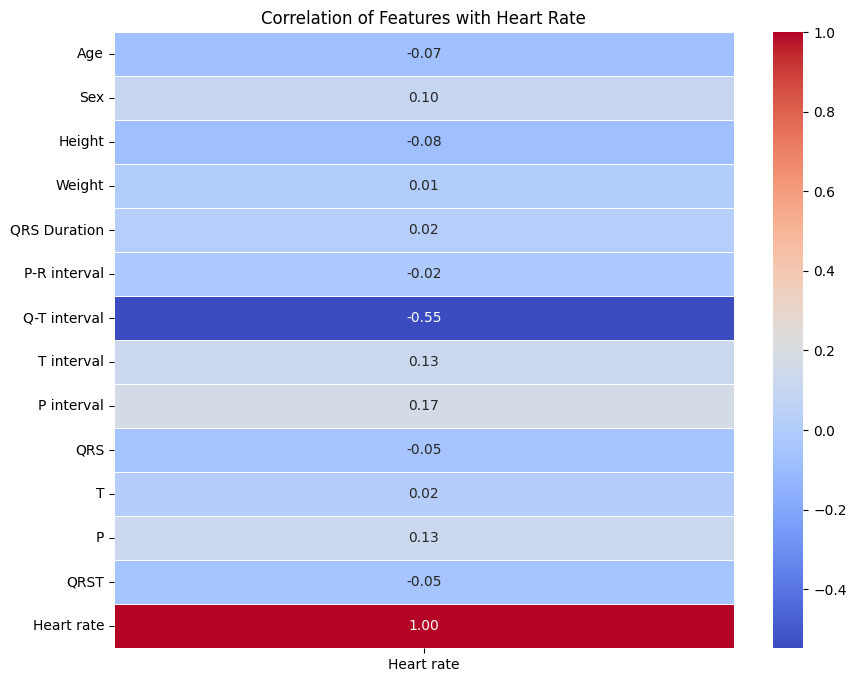

In [105]:
# Convert 'Sex' column to numerical values
arrhythmia_data['Sex'] = arrhythmia_data['Sex'].map({'Male': 0, 'Female': 1})

# Correlation matrix for continuous variables to see their relationship with Heart Rate
correlation_matrix = arrhythmia_data.corr()
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix[['Heart rate']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation of Features with Heart Rate")
plt.show()

**Creating a BMI variable from weight and height:**
So, BMI is a result of weight and height which were captured in this arrhythmia_data. So I went further to derive and create another variable BMI
**BMI = weight(kg) / height(m)^2**

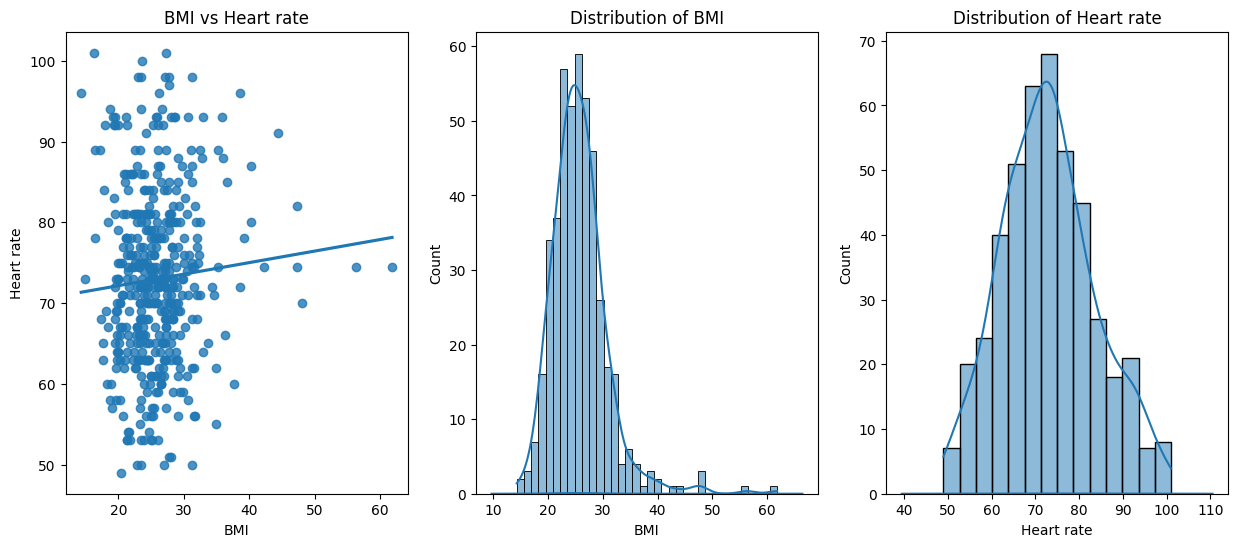

In [110]:
arrhythmia_data['BMI'] = (arrhythmia_data['Weight'] / (arrhythmia_data['Height']/100)**2).round(2)
arrhythmia_data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot scatter plot with regression line on the first subplot
sn.regplot(x='BMI', y='Heart rate', data=arrhythmia_data, ax=axes[0], ci=None)

# Plot histogram with normal curve on the second subplot
sn.histplot(data=arrhythmia_data, x="BMI", ax=axes[1], kde=True)
sn.histplot(data=arrhythmia_data, x="Heart rate", ax=axes[2], kde=True)

# Add a normal curve to the histogram
sn.kdeplot(data=arrhythmia_data, x="BMI", ax=axes[1])
sn.kdeplot(data=arrhythmia_data, x="Heart rate", ax=axes[2])

# Set titles for the subplots
axes[0].set_title('BMI vs Heart rate')
axes[1].set_title('Distribution of BMI')
axes[2].set_title('Distribution of Heart rate')

# Display the plot
plt.show()

1. Both BMI and Heart rate approximately fit a normal distribution.
2. When a scatter plot was done, I identified that there is a weak positive relationship between BMI and Heart rate with most of the dispersion on the right hand side between 20 & 30.

In [113]:
variable_pairs = [('Age', 'Heart rate'),
                  ('Height', 'Heart rate'),
                  ('Weight', 'Heart rate'),
                  ('QRS Duration', 'Heart rate'),
                  ('P-R interval', 'Heart rate'),
                  ('Q-T interval', 'Heart rate'),
                  ('T interval', 'Heart rate'),
                  ('P interval', 'Heart rate'),
                  ('QRS', 'Heart rate'),
                  ('T', 'Heart rate'),
                  ('P', 'Heart rate'),
                  ('BMI', 'Heart rate')]

results = []
for var in variable_pairs:
    slope, intercept, r_value, p_value, std_err = linregress(arrhythmia_data[var[0]], arrhythmia_data[var[1]])
    results.append([var[0], var[1], slope, intercept, r_value, p_value, std_err])

# print the results as a table
headers = ['Variable 1', 'Variable 2', 'Slope', 'Intercept', 'R-Value', 'P-Value', 'Std Err   ']
print(tabulate(results, headers=headers))

Variable 1    Variable 2          Slope    Intercept      R-Value      P-Value    Std Err
------------  ------------  -----------  -----------  -----------  -----------  ------------
Age           Heart rate    -0.0532204       75.522   -0.0730267   0.12106         0.0342633
Height        Heart rate    -0.082674        86.5338  -0.0799796   0.0894316       0.0485724
Weight        Heart rate     0.0050855       72.6373   0.00577474  0.902556        0.0415134
QRS Duration  Heart rate     0.0263584       70.6996   0.0234211   0.619451        0.053038
P-R interval  Heart rate    -0.00795739      74.251   -0.0166262   0.724446        0.0225586
Q-T interval  Heart rate    -0.238699       160.816   -0.548707    6.7576e-37      0.0171442
T interval    Heart rate     0.0596765       63.2569   0.127251    0.00675032      0.0219276
P interval    Heart rate     0.116129        62.5024   0.170237    0.000277073     0.0316879
QRS           Heart rate    -0.0140643       73.4871  -0.0520537   0.26943

The analysis of the correlation between heart rate and each of the variables has mixed results regarding the strength and significance of the correlations. The Q-T interval is very significantly negatively correlated with heart rate (p-value = 6.76e-37) with a strong negative slope of -0.2387, indicating that as the Q-T interval increases, heart rate decreases. Similarly, the P interval is positively correlated with heart rate (p-value = 0.000277) with a slope of 0.1161, meaning that the longer the P interval, the higher the heart rate. T interval is also positively correlated (slope = 0.0597, p-value = 0.00675), although the correlation is not as strong.

On the other hand, Age, Height, and QRS have weaker relations with heart rate, as Age and Height have negative slopes (-0.0532 and -0.0827, respectively) but non-significant p-values (0.1211 and 0.0894), indicating that their influence on heart rate is minimal and not statistically significant. QRS duration, while it does show a gentle positive slope of 0.0264, also has a moderate p-value of 0.6195, which indicates that its linearity with the heart rate is not significant. Additionally, Weight, P-R interval, and BMI all have non-significant p-values (0.9026, 0.7244, and 0.1411, respectively), which indicate that they do not have any significant linear relationship with the heart rate.

The strongest and statistically meaningful relationship exists between Q-T interval and heart rate, while other parameters such as P interval and T interval are significantly correlated. However, the majority of other parameters, i.e., Age, Height, Weight, and BMI, are not significantly correlated with heart rate.

b. The QRS is an important indicator of a normal heart, and several types of arrhythmia (e.g . Sinus tachycardia). Use peer-reviewed academic 
resources and suitable statistical tools to classify the patients within the dataset (i.e. highlight patients with arrhythmias).  

According to _Kashani, A., & Barold, S. S. (2005). Significance of QRS complex duration in patients with heart failure. Journal of the American College of Cardiology, 46(12), 2183-2192._, QRS length greater than 120 milliseconds (ms) is generally increased and may indicate conduction abnormalities. This threshold is commonly used in the clinic as a filter for patients who may require cardiac evaluation. 

I will therefore be using this as my threshold to classify patients

In [114]:
# Function to categorize QRS duration
def categorize_qrs_duration(qrs_duration):
    if qrs_duration < 100:
        return 'Normal Sinus Rhythm'
    elif 100 <= qrs_duration < 120:
        return 'Sinus Tachycardia'
    elif 120 <= qrs_duration <= 150:
        return 'Atrial Fibrillation (Rapid Ventricular Response)'
    else:
        return 'Ventricular Tachycardia'

# Apply the function to the 'QRS Duration' column
arrhythmia_data['arrhythmia_types'] = arrhythmia_data['QRS'].apply(categorize_qrs_duration)

# Display the first few rows of the DataFrame to see the new column
print(arrhythmia_data[['QRS', 'arrhythmia_types']].head())

    QRS     arrhythmia_types
0 -16.0  Normal Sinus Rhythm
1  25.0  Normal Sinus Rhythm
2  96.0  Normal Sinus Rhythm
3  28.0  Normal Sinus Rhythm
4 -16.0  Normal Sinus Rhythm


In [115]:
arrhythmia_data['arrhythmia_types'].unique()

array(['Normal Sinus Rhythm', 'Sinus Tachycardia',
       'Atrial Fibrillation (Rapid Ventricular Response)'], dtype=object)

In [116]:
arrhythmia_data.head()

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,Heart rate,BMI,arrhythmia_types
0,75.0,0,190.0,80.0,91.000000,193.0,371.0,174.0,121.000000,-16.0,13.0,64.000000,-2.0,63.000000,22.16,Normal Sinus Rhythm
1,56.0,1,165.0,64.0,81.000000,174.0,401.0,149.0,90.004425,25.0,37.0,48.913953,31.0,53.000000,23.51,Normal Sinus Rhythm
2,54.0,0,172.0,95.0,88.920354,163.0,386.0,185.0,102.000000,96.0,34.0,70.000000,66.0,75.000000,32.11,Normal Sinus Rhythm
3,55.0,0,175.0,94.0,100.000000,202.0,380.0,179.0,90.004425,28.0,11.0,48.913953,20.0,71.000000,30.69,Normal Sinus Rhythm
4,75.0,0,190.0,80.0,88.000000,181.0,360.0,177.0,103.000000,-16.0,13.0,61.000000,3.0,72.987453,22.16,Normal Sinus Rhythm


In [117]:
# Filter the DataFrame to include only patients with arrhythmias
arrhythmia_patients = arrhythmia_data[arrhythmia_data['arrhythmia_types'] != 'Normal Sinus Rhythm']

# Display the DataFrame
arrhythmia_patients

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,Heart rate,BMI,arrhythmia_types
5,13.000000,0,169.000000,51.000000,100.000000,167.0,321.000000,174.000000,91.0,107.0,66.000000,52.000000,88.000000,84.000000,17.86,Sinus Tachycardia
60,46.471239,0,110.000000,68.170354,80.000000,121.0,367.207965,156.000000,67.0,126.0,25.000000,60.000000,104.000000,74.463415,56.34,Atrial Fibrillation (Rapid Ventricular Response)
76,45.000000,0,177.000000,72.000000,94.000000,164.0,431.000000,158.000000,81.0,116.0,36.150901,37.000000,36.716186,63.000000,22.98,Sinus Tachycardia
198,13.000000,1,133.000000,68.170354,96.000000,176.0,356.000000,171.000000,137.0,102.0,-63.000000,68.000000,-10.000000,96.000000,38.54,Sinus Tachycardia
211,18.000000,0,180.000000,63.000000,93.000000,160.0,321.000000,172.000000,101.0,111.0,72.000000,75.000000,80.000000,92.000000,19.44,Sinus Tachycardia
316,46.471239,0,166.188053,68.170354,83.000000,126.0,367.207965,128.000000,60.0,125.0,21.000000,48.913953,102.000000,74.463415,24.68,Atrial Fibrillation (Rapid Ventricular Response)
321,26.000000,0,180.000000,97.000000,88.000000,197.0,404.000000,188.000000,99.0,119.0,16.000000,49.000000,88.000000,59.000000,29.94,Sinus Tachycardia
336,31.000000,1,165.000000,56.000000,74.000000,199.0,384.000000,142.000000,100.0,110.0,11.000000,54.000000,92.000000,75.000000,20.57,Sinus Tachycardia
348,34.000000,1,165.000000,60.000000,74.000000,178.0,302.000000,127.000000,117.0,112.0,15.000000,50.000000,104.000000,74.463415,22.04,Sinus Tachycardia
379,46.471239,0,120.000000,68.170354,88.920354,126.0,303.000000,164.000000,80.0,120.0,17.000000,37.000000,68.000000,74.463415,47.34,Atrial Fibrillation (Rapid Ventricular Response)


In [118]:
arrhythmia_patients.shape

(13, 16)

There are 13 patients with arrhythmias has shown in the table above